In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/kaggle/input/college-student-placement-factors-dataset/college_student_placement_dataset.csv")

In [3]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [4]:
data.shape
# tells about the total no of disstribution or we can say that no.of rows and columns

(10000, 10)

In [5]:
data.columns
#  here we can tell how many indexs are there 

Index(['College_ID', 'IQ', 'Prev_Sem_Result', 'CGPA', 'Academic_Performance',
       'Internship_Experience', 'Extra_Curricular_Score',
       'Communication_Skills', 'Projects_Completed', 'Placement'],
      dtype='object')

In [6]:
no_yes_dict = {"No":0 , "Yes":1}
data[data.columns[5]] = data[data.columns[5]].map(no_yes_dict)
data[data.columns[-1]]= data[data.columns[-1]].map(no_yes_dict)
# firstly we create a dictionar that maps no =0,yes =1
# select entire data of column 6 and replace every 0 with no and 1 with yes
# -1 index give you last column name do the same thing like recent

In [7]:

data.head()
# show data

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


In [8]:
data[data.columns[0]] = data[data.columns[0]].apply(lambda x : int(x[3:]))
# lets break down the code
# data[data.columns[0]]= we are selecting the data of column (here it is clg id)
# .apply(lambda x : int (x[3:])) the code runs for the given values of x
#  int(x[3:])  = the function is doing sliceing (it will remove starting 3 letters)  and convert the string into integer                                        


In [9]:
data.head() 

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,30,107,6.61,6.28,8,0,8,8,4,0
1,61,97,5.52,5.37,8,0,7,8,0,0
2,36,109,5.36,5.83,9,0,3,1,1,0
3,55,122,5.47,5.75,6,1,1,6,1,0
4,4,96,7.91,7.69,7,0,8,10,2,0


In [10]:

corr_matrix = data.corr()
# data.corr() = calculate the pairwise correlation b/w every numerical columns(deep chiz h padhno pade go)
# corr_matrix = dataframe(a square table) corr_matrix is a heatmap-style table that shows how strongly or weakly your numeric variables are related to each other.


In [11]:

corr_matrix

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
College_ID,1.000000,0.002473,-0.004060,-0.003422,-0.015442,0.012037,-0.003931,-0.005194,0.004903,0.002750
IQ,0.002473,1.000000,-0.002640,-0.002859,-0.006827,-0.000247,-0.003458,-0.010896,0.014538,0.285914
Prev_Sem_Result,-0.004060,-0.002640,1.000000,0.980768,-0.005765,-0.013347,0.009326,-0.017269,0.018434,0.317896
CGPA,-0.003422,-0.002859,0.980768,1.000000,-0.002958,-0.012562,0.011441,-0.018242,0.020872,0.321607
Academic_Performance,-0.015442,-0.006827,-0.005765,-0.002958,1.000000,0.025903,0.011774,-0.019733,-0.013148,-0.014920
Internship_Experience,0.012037,-0.000247,-0.013347,-0.012562,0.025903,1.000000,0.002093,-0.020437,-0.010260,-0.005841
Extra_Curricular_Score,-0.003931,-0.003458,0.009326,0.011441,0.011774,0.002093,1.000000,0.003769,0.008122,-0.004740
Communication_Skills,-0.005194,-0.010896,-0.017269,-0.018242,-0.019733,-0.020437,0.003769,1.000000,-0.004486,0.323155
Projects_Completed,0.004903,0.014538,0.018434,0.020872,-0.013148,-0.010260,0.008122,-0.004486,1.000000,0.217499
Placement,0.002750,0.285914,0.317896,0.321607,-0.014920,-0.005841,-0.004740,0.323155,0.217499,1.000000


In [12]:


feature_selected_data = data[[data.columns[1],data.columns[2],data.columns[3],data.columns[7],data.columns[8],data.columns[9]]]
# hear we are selecting and making another table of factors that depend on placement  

In [13]:






feature_selected_data.head()
# initiating

,IQ,Prev_Sem_Result,CGPA,Communication_Skills,Projects_Completed,Placement
0,107,6.61,6.28,8,4,0
1,97,5.52,5.37,8,0,0
2,109,5.36,5.83,1,1,0
3,122,5.47,5.75,6,1,0
4,96,7.91,7.69,10,2,0


In [14]:

placement_equal_1_prior = data[data[data.columns[-1]]==1].shape[0]/data.shape[0]
# data[data.columns[-1]] =  selecting the data of last column in our situatiion it is placement column
# data[data[data.columns[-1] ==1]] = selecting the data in column have 1
# .shape[0]= count by total no. of rows
# /data.shape[0]=divide by total no. of rows in the data


In [15]:
placement_equal_1_prior

0.1659

<Axes: >

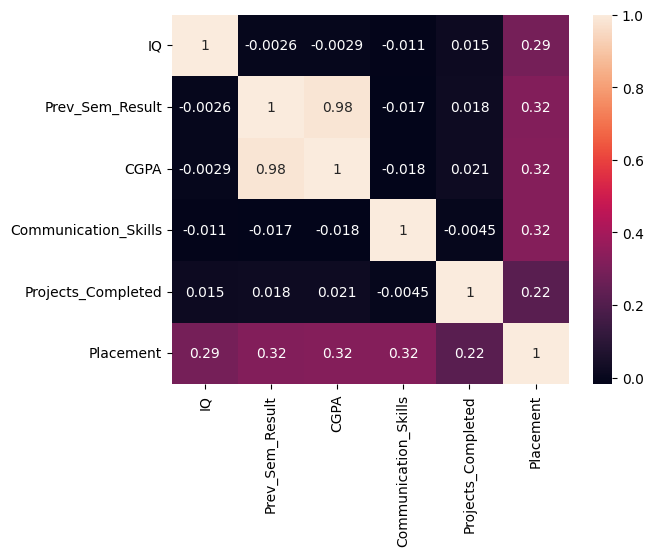

In [16]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            sns.heatmap(feature_selected_data.corr(),annot = True)                                                                                      

In [17]:
#agar apke pass n*n ki square matrix hai 
# uske n igon vectors hoge  and every igon vector is n*1
#  all this igon vectors are orthogonal vectors

In [18]:
X = np.array(feature_selected_data.iloc[:,0:-1])
cov_mat = np.cov(X,rowvar = False)
F = np.linalg.svd(cov_mat)
E = F[0]
lamda = F[1]

In [19]:
lamda

array([2.26597565e+02, 8.41678439e+00, 4.21673530e+00, 2.94002762e+00,
       4.09142123e-02])

In [20]:
E

array([[-9.99996139e-01, -2.17743344e-03, -3.46642553e-04,
        -1.69114141e-03,  1.81562132e-05],
       [ 2.57815004e-04,  1.75779405e-02, -7.00202535e-01,
        -3.92089239e-02, -7.12649998e-01],
       [ 2.83169595e-04,  1.83550525e-02, -7.11415827e-01,
        -3.77209711e-02,  7.01518112e-01],
       [ 2.18074163e-03, -9.99665581e-01, -2.56049574e-02,
         2.87028185e-03,  3.43247779e-04],
       [-1.67910057e-03,  4.25354616e-03, -5.42973035e-02,
         9.98513240e-01, -1.48345515e-03]])

In [21]:
e1 = E[:, 0]
e2 = E[:,1]
e1_magnitude = np.linalg.norm(e1,2)
print("the dot product b/w e1 and e2",np.dot(e1,e2))
print("the magnitude of e1 is", e1_magnitude)
np.dot(e1,e2)

the dot product b/w e1 and e2 4.2595875507287843e-19
the magnitude of e1 is 1.0000000000000002


4.2595875507287843e-19

In [22]:
new_X = np.matmul(X,E)
new_X_cov_mat = np.cov(new_X,rowvar = False)
new_X_cov_mat

array([[ 2.26597565e+02, -6.45436300e-14,  3.26882347e-16,
        -1.79572107e-15,  3.26882347e-17],
       [-6.45436300e-14,  8.41678439e+00, -1.94175220e-15,
        -4.49907360e-16, -5.77262677e-16],
       [ 3.26882347e-16, -1.94175220e-15,  4.21673530e+00,
        -1.32253000e-15,  8.46857338e-16],
       [-1.79572107e-15, -4.49907360e-16, -1.32253000e-15,
         2.94002762e+00, -7.57392171e-16],
       [ 3.26882347e-17, -5.77262677e-16,  8.46857338e-16,
        -7.57392171e-16,  4.09142123e-02]])

In [23]:
new_input_features_data = pd.DataFrame(data = new_X,columns = ["inp_feature_1", "inp_feature_2","inp_feature_3","inp_feature_4","inp_feature_5"])

In [24]:
new_input_features_data

,inp_feature_1,inp_feature_2,inp_feature_3,inp_feature_4,inp_feature_5
0,-106.985375,-7.981836,-9.555150,3.340004,-0.306328
1,-96.979236,-8.012939,-7.923885,-0.560073,-0.162169
2,-108.996045,-1.031525,-8.018326,0.386976,0.270885
3,-121.985085,-6.057694,-8.170966,0.378047,0.138325
4,-95.976963,-9.916990,-11.407312,1.263163,-0.240179
...,...,...,...,...,...
9995,-118.977579,-7.956445,-12.032431,-0.820737,-0.172895
9996,-69.982793,-6.807540,-13.433592,1.183742,-0.039127
9997,-88.985088,-8.947921,-9.236363,4.393741,0.048864
9998,-106.985575,-4.909174,-12.706018,0.151579,0.009777


<Axes: >

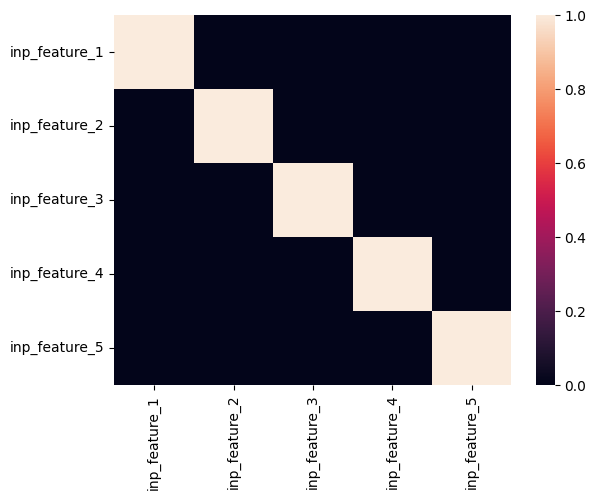

In [25]:
sns.heatmap(new_input_features_data.corr())